In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In order to generate a random curve, first we draw n = 300 real numbers uniformly at random on [0, 1], and call them $x_1, . . . , x_n$. Also, we draw $n$ n real numbers uniformly at random on $[-\frac{1}{10},\frac{1}{10}]$, call them $v_1, . . . , v_n$ representing the noise. Next, we generate the sample points $d_i$ on the random curve using,
\begin{equation}
d_i = sin(20x_i) + 3x_i + v_i
,\,\,\,\,\text{for}\,\,\,\,i = 1, . . . , n.
\end{equation}

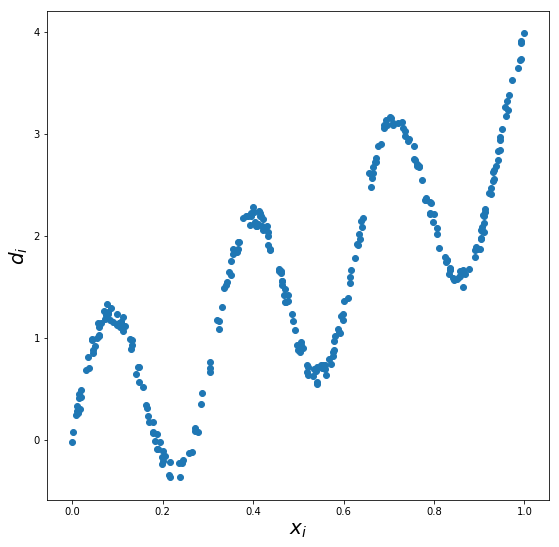

In [3]:
p=300 #total number of samples

x = np.random.uniform(0,1,p) # x ~ U[0,1]

v = np.random.uniform(-0.1,0.1,p) # v ~ U[-0.1,0.1]

d = np.sin(20*x) + 3*x + v
plt.figure(figsize=(9, 9))  
plt.scatter(x, d)
plt.xlabel('$x_i$',fontsize=20)
plt.ylabel('$d_i$', fontsize=20)
plt.show()

We will consider a one layer neural network with one input, N = 24 hidden neurons, and 1 output neuron (the network structure is 1xNx1).
The network will thus have $3N + 1$ weights including biases. Let $w$ denote the vector of all these $3N + 1$
weights. The output neuron will use the linear activation function $φ_output(v) = v$; all other neurons will use the
activation function $φ(v) = tanh(v)$. Given input x, we use the notation $f(x, w)$ to represent the network
output.
Now, our goal here is to use the backpropagation algorithm to train the network to find the optimal weights/network that minimize the Mean Squared Error (MSE). That is, we are seeking to solve the following optimization problem using the backpropagation algorithm,

\begin{equation}
argmin_{\mathbf{w}}\frac{1}{n}\sum^{n}_{i=1}\left(d_i-f(x_i,\mathbf{w})\right)^2
\end{equation}



##### Neural Network Structure

In [4]:
class NeuralNetworks(object):
    def __init__(self): #Initializing the weight vectors
        self.n = 24 # Number of hidden neurons
        self.eta = 0.01 # Gradient step learning rate
        self.w_1 = np.random.normal(0,1,(self.n,1)) # Input --> Hidden initial weight vector
        self.b_1 = np.ones((self.n,1))
        self.w_2 = np.random.uniform(0,1,(self.n,1)) # Hidden --> Output initial weight vector
        self.b_2 = np.ones((1,1))
    def FeedForward(self,x): # This method feeds forward the input x and returs the predicted output
        # I use the same notation as Haykin book
        self.v_1 = x*(self.w_1) + self.b_1 #Local Induced Fileds of the hidden layer
        self.y_1 = np.tanh(self.v_1)
        self.v_2 = self.y_1.T.dot(self.w_2) + self.b_2
        self.o = self.v_2 # output of the network
        return self.o
    def loss(self,x,d): # Calculates the cost function of the network for a 'vector' of the inputs/outputs
        #x : input vector
        #d : desired output
        temp = np.zeros(len(x))
        for i in range(len(x)):
            temp[i] = d[i] - self.FeedForward(x[i])
        self.cost = np.mean(np.square(temp))
        return self.cost
    def BackPropagate(self,x,y,d): 
        # Given the input, desired output, and predicted output 
        # this method update the weights accordingly
        # I used the same notation as in Haykin: (4.13)
        self.delta_out = (d-y)*1 # 1: phi' of the output at the local induced field
        self.w_2 += self.eta*self.delta_out*self.y_1
        self.b_2 += self.eta*self.delta_out
        
        self.delta_1 = (1 - np.power(np.tanh(self.v_1), 2))*(self.w_2)*self.delta_out
        self.w_1 += self.eta*x*self.delta_1
        self.b_1 += self.eta*self.delta_1
    def train(self,x,d,epoch=100): # Given a vector of input and desired output, this method trains the network
        iter = 0
        while (iter != epoch):
            for i in range(len(x)):
                o = self.FeedForward(x[i]) # Feeding forward 
                self.BackPropagate(x[i],o,d[i]) # Backpropagating the error and updating the weights
            if iter%(epoch/5)==0:
                print ("Epoch: %d\nLoss: %f"%(iter,self.loss(x,d)))
            iter +=1

In [7]:
shahin = NeuralNetworks()
print ("Initial Loss: %f"%(shahin.loss(x,d)))
print("----|Training|----")
shahin.train(x,d,5000)
print("----Training Completed----")


Initial Loss: 52.842383
----|Training|----
Epoch: 0
Loss: 0.483033
Epoch: 1000
Loss: 0.457345
Epoch: 2000
Loss: 0.347502
Epoch: 3000
Loss: 0.058202
Epoch: 4000
Loss: 0.054578
----Training Completed----


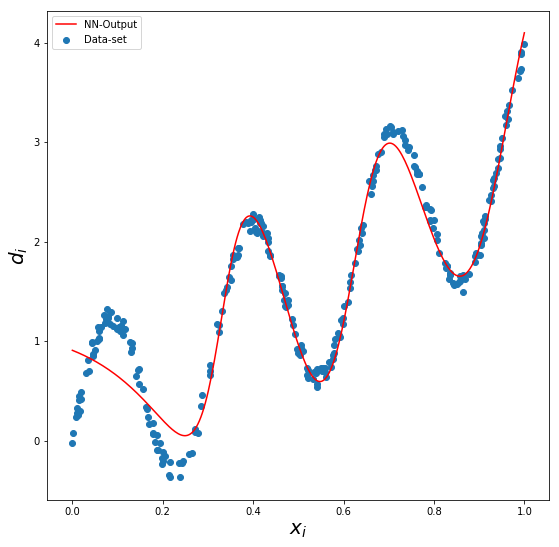

In [8]:
yy = np.zeros(len(x))
xx = np.linspace(0,1,len(x))
for i in range(len(xx)):
    yy[i] = shahin.FeedForward(xx[i])
plt.figure(figsize=(9, 9))  
plt.scatter(x, d,label='Data-set')
plt.plot(xx,yy,color='red',label='NN-Output')
plt.xlabel('$x_i$',fontsize=20)
plt.ylabel('$d_i$', fontsize=20)
plt.legend()
plt.show()


As it can be seen from the figure above, the network can accurately fit the given data set. We assumed a gradient descent learning parameter of $\eta=0.01$. The total cost of MSE of the network after convergence is approximately $MSE=0.05$ for *5000* epochs.